In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
dataset = pd.read_csv(r"C:\Users\hp\Downloads\Zomato data .csv")
dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [71]:
dataset['rate']

0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object

In [72]:
def handle_rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataset['rate'] = dataset['rate'].apply(handle_rate)
print(dataset['rate'])

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of resturent')

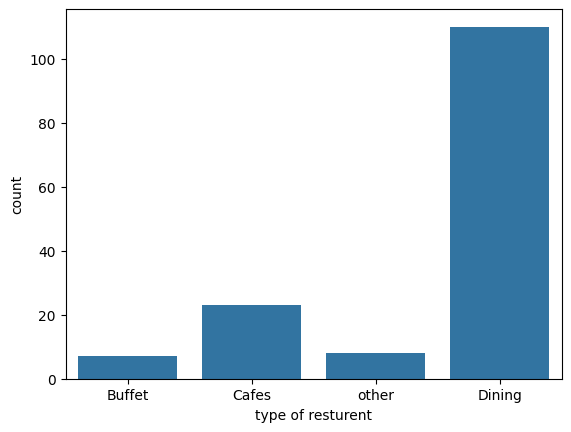

In [79]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel("type of resturent")

Text(0, 0.5, 'Votes')

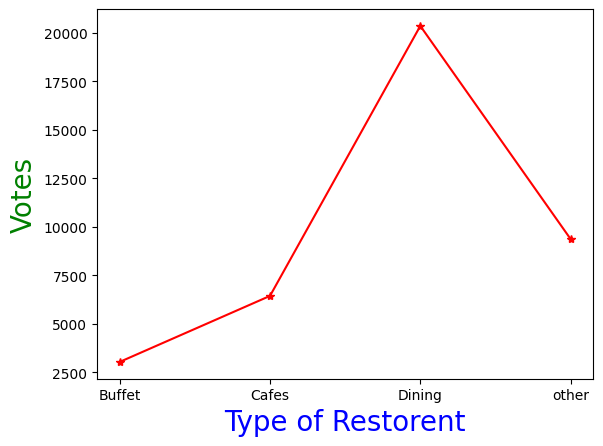

In [75]:
grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result,color="red",marker="*")
plt.xlabel("Type of Restorent",c="blue",size=20)
plt.ylabel("Votes",c="green",size=20)

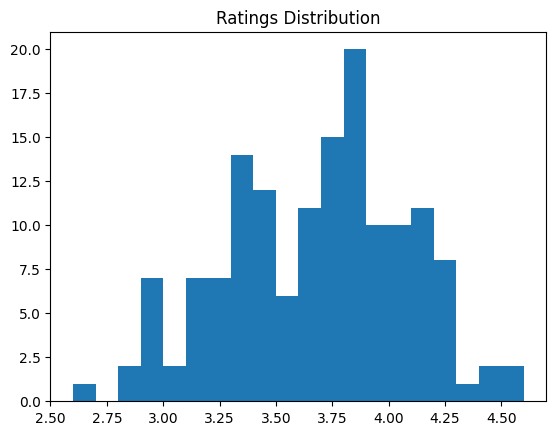

In [76]:
plt.hist(dataset['rate'],bins=20)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

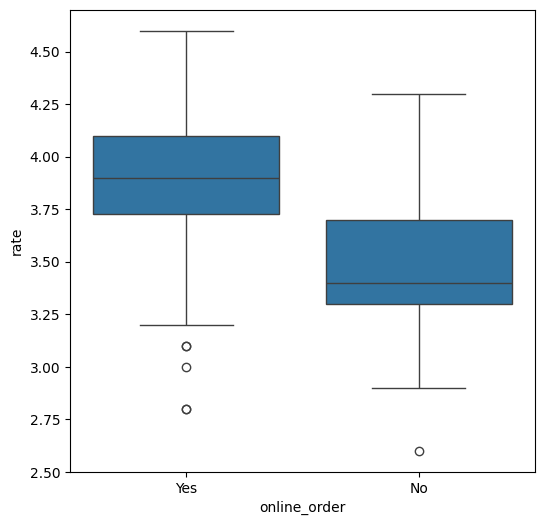

In [80]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = dataset)

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

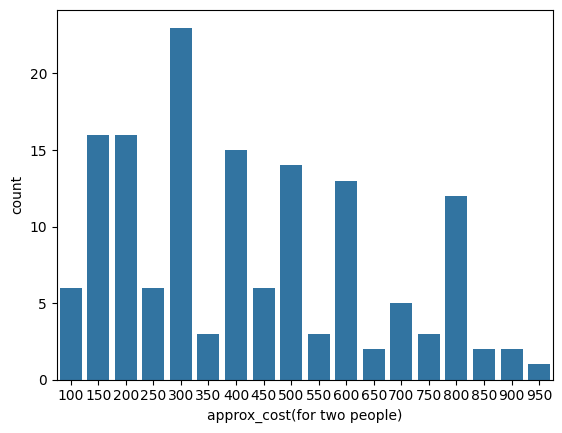

In [81]:
couple_data = dataset['approx_cost(for two people)']
sns.countplot(x=couple_data)

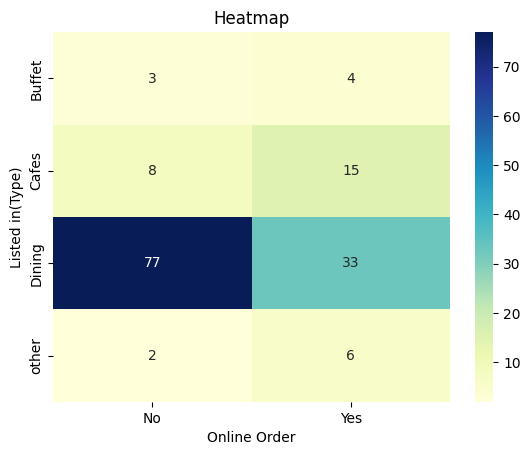

In [78]:
pivot_table = dataset.pivot_table(index='listed_in(type)',columns='online_order' , aggfunc = 'size' , fill_value=0)
sns.heatmap(pivot_table ,annot=True ,cmap="YlGnBu" ,fmt ='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in(Type)")
plt.show()